# Data Exploration 01

A consumer watchdog group wants to see if Netflix has more movies for adults or children. 

Using a dataset containing metadata for all of the movies Netflix had available on their platform in 2019, use the [MPAA movie rating system](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system#MPAA_film_ratings) to determine if they are correct.


## Part 1: Import Pandas

The [Pandas library](https://pandas.pydata.org) is a data analysis and manipulation tool that will provide the core functionality for most of what you do in the data exploration and preprocessing stages of most machine learning projects.

Please see [this Getting Started Guide](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html) for information on the conventional way to import Pandas into your project, as well as other helpful tips for common Pandas tasks.


In [1]:
# Part 1: Enter your code below to import Pandas according to the 
# conventional method.
import pandas as pd


## Part 2: Load the data

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv)

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column? 
* Do any of the columns have missing values? 

In [2]:
# Part 2: Enter your code below to load the dataset into a Pandas dataframe.
# Write any code needed to explore the data by first displaying a technical 
# summary to determine the data types of each column as well as to see which 
# columns have missing data. Then display the first few rows of the data

netflix = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv')

# From the results of info(), it appears that most columns have some missing 
# values, with director, cast, country having the most missing
netflix.info()

# Note the missing values for director in the first few rows. Missing values
# here are represented by "NaN" (Not a Number)
netflix.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Part 3: Filter the Data

Since we're just interested in movies, we'll need to [filter out anything](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) that isn't a movie for our analysis. It appears that the `type` column is our best bet.

Once we have the subset, we should see how many rows it contains. There are a variety of ways to get the length of a data frame, [but most people just use `len()`](https://stackoverflow.com/a/38025280/28106).

In [3]:
# Use pandas's filtering abilitites to select the subset of data
# that represents movies, then calculate how many rows are in the filtered data.
movies = netflix[ netflix['type'] == 'Movie' ]
len(movies)

4265

### MPAA Ratings
Now that we have only movies, let's get a [quick count of the values being used](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)  in the `rating` column.

In [4]:
# Use pandas's aggregation abilities to determine which ratings are appearing
# in the rating column.
movies['rating'].value_counts()

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64

### More Filtering

There are apparently some "made for TV" movies in the list that don't fit the
[MPAA rating scheme](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system#MPAA_film_ratings). 

Let's [filter some more](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) to just see movies rated with the standard MPAA ratings of G, PG, PG-13, R, and NC-17.

In [5]:
# Filter the list of movies to select a new subset containing only movies with
# a standard MPAA rating. Calculate how many rows are in this new set, and
# see which ratings appear most often.
mpaa = movies[ movies['rating'].isin( ['G', 'PG', 'PG-13', 'R', 'NC-17']) ]
len(mpaa)

mpaa['rating'].value_counts()

R        506
PG-13    286
PG       183
G         36
NC-17      2
Name: rating, dtype: int64

## Part 4: Visualization 

Now that we have explored and preprocessed our data, let's create a visualization to summarize our findings.

### Seaborn
While Pandas includes some basic visuzliation functions, the [Seaborn library](https://seaborn.pydata.org) provides a large variety of very easy to use statistical charting tools.

Like with Pandas, there is a [conventional way to import Seaborn](https://seaborn.pydata.org/tutorial/relational.html) into your projects.

Optionally, you may wish to set some default chart aesthetics by [setting the chart style](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [6]:
# Import the seaborn library the conventional way. Then optionally configure
# the default chart style.
import seaborn as sns
sns.set()
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Create the visualization
Since the `rating` column uses categorical data (which you'll read more about in [Preparation Reading 02](https://byui-cse.github.io/cse450-course/module-01/preparation-02.html), we need to use Seaborn's [categorical visualizations](https://seaborn.pydata.org/tutorial/categorical.html).

In particular, we want a chart that will display a [count](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) of movie ratings.



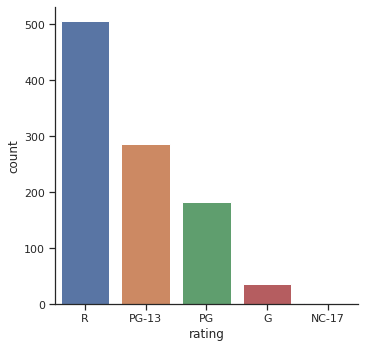

In [7]:
# Use seaborn to create a visualization comparint the count of each movie rating
sns.catplot(data=mpaa, x='rating', kind='count')

# Part 5: Interpretation and Conclusions

Now that you've seen the data, what is your conclusion? Is the watchdog group
correct that Netflix has more movies for adults than for children? Are there any
caveats you'd include in your analysis?

Write your summary here:

> At first glance it appears that there are many more movies for adults than kids, if you look only at the difference between the number of R and G-rated movies.
> 
> However, this depends a great deal on what you consider to be a "kid's movie". Are 15-year-olds considered kids? If so, then you could consider PG-13 movies to be "movies for kids". Including G, PG, and PG-13 movies together would give a total of 505 movies, compared to 506 R rated movies.
>
> In addition, Netflix had over 3,000 items listed as "movies", but which had TV ratings rather than MPAA ratings. Including those items in the analysis may result in a different distribution of "for kids" vs "for adults".

## 🌟 Above and Beyond 🌟

After reviewing your findings, the watchdog group would like some additional questions answered:

1. How are things affected if you include the "made for TV movies" that have been assigned [TV ratings](https://en.wikipedia.org/wiki/Television_content_rating_system#United_States) in your analysis, but still exclude unrated movies?

2. They would also like to see a separate report that includes only TV shows.

3. For an upcoming community meeting, the group would like to present a simple
chart showing "For Kids" and "For Adults" categories. The easiest way to accomplish this would be to [create a new column in your data frame that maps](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html) each rating to the appropriate "For Kids" or "For Adults" label, then create a new visualization based on that column.